In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
os.chdir('../data/')

In [3]:
img1 = cv2.imread('cat_375.jpg', 1)
img2 = cv2.imread('_.jpeg', 1)

<h3>separate rgb from img<h3>


In [3]:
B, G, R = cv2.split(img2)

print(B)
cv2.imshow('B', G)

cv2.waitKey(0)
cv2.destroyAllWindows()

[[244 244 245 ...  39  39  40]
 [244 243 246 ...  39  39  40]
 [244 242 245 ...  40  40  41]
 ...
 [  3   3   3 ...   4   4   4]
 [  2   2   2 ...   5   5   5]
 [  2   2   2 ...   5   5   5]]


QSocketNotifier: Can only be used with threads started with QThread


<h3>concatenate RGB<h3>


In [4]:
img2 = cv2.merge([B, G, R])

cv2.imshow('RGB', img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

<h3>copy head to new place<h3>


In [5]:
head = img2[22:198, 219:356]
img2[0:0+head.shape[0],0:0+head.shape[1]] = head


cv2.imshow('img2', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

<h3>merge 2 images<h3>


In [6]:
img1 = cv2.imread('cat_375.jpg', 1)
img2 = cv2.imread('_.jpeg', 1)

In [7]:
print(img1.shape)
img2.shape

(720, 1080, 3)


(690, 552, 3)

In [8]:
img1 = cv2.resize(img1, (512, 512))
img2 = cv2.resize(img2, (512, 512))
dst = cv2.add(img1, img2)
cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
# handle weight

# img1, weight1, img2, weight2, gamma "brightness"
dst = cv2.addWeighted(img1, 0.7, img2, 0.3, 0)
cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

<h1>Bitwise Operations<h1>
<h4>working with binary images<h4>

In [10]:
img1 = np.zeros((512, 512, 3), np.uint8)
img1 = cv2.rectangle(img1,(200,0), (300,100), (255,255,255),-1)

img2 = np.full((512, 512, 3), 255, np.uint8)  # white image
img2 = cv2.rectangle(img2, (0, 0), (250, 512), (0, 0, 0), -1)

cv2.imshow("img1", img1)
cv2.imshow("img2", img2)


# Bitwise AND
bitwise_and = cv2.bitwise_and(img2, img1)
cv2.imshow("bitwise_and", bitwise_and)

# Bitwise OR
bitwise_or = cv2.bitwise_or(img2, img1)
cv2.imshow("bitwise_or", bitwise_or)

# Bitwise XOR
bitwise_xor = cv2.bitwise_xor(img2, img1)
cv2.imshow("bitwise_xor", bitwise_xor)

# Bitwise NOT
img2_bitwise_not = cv2.bitwise_not(img2)
cv2.imshow("bitwise_not", img2_bitwise_not)
img1_bitwise_not = cv2.bitwise_not(img1)
cv2.imshow("bitwise_not", img1_bitwise_not)

cv2.waitKey(0)
cv2.destroyAllWindows()

<h1>control BGR<h1>


In [11]:
def nothing(x):
    print(x)

img = np.zeros((300,512,3),np.uint8)
cv2.namedWindow('image')

cv2.createTrackbar('B','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('R','image',0,255,nothing)

switch = "0 : OFF \n1 : ON"
cv2.createTrackbar(switch,'image',0,1,nothing)

while True:
    cv2.imshow('image',img)
    # wait 1 millisecond and check if any key is pressed if yes break if no continue
    k = cv2.waitKey(1)
    if k == 27:
        break

    b = cv2.getTrackbarPos('B','image')
    g = cv2.getTrackbarPos('G','image')
    r = cv2.getTrackbarPos('R','image')
    s = cv2.getTrackbarPos(switch,'image')

    if s==0:
        img[:,:] = 0
    else:
        img[:,:] = [b,g,r]

cv2.destroyAllWindows()

11
26
41
52
65
76
86
94
102
110
117
127
137
147
157
166
176
183
190
196
203
208
213
218
223
1


# image Translation
## shift the image up - down - right - left

In [4]:
def translation(img, x, y):
    trans_mat = np.float32([[1,0,x],[0,1,y]])
    dimensions = (img.shape[1],img.shape[0])

    return cv2.warpAffine(img,trans_mat,dimensions)

img = cv2.imread('cat_375.jpg')
# translated_img = translation(img,100,100) # shift image by 100px to the right and 100px down
translated_img = translation(img, -100, -100) # shift image by 100px to the left and 100px up

cv2.imshow('img',img)
cv2.imshow('translated_img',translated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Rotation

In [10]:
def rotation(img, angle, rot_point=None):
    (height, width) = img.shape[:2]

    if rot_point is None:
        rot_point = (width//2, height//2)
    
    rot_mat = cv2.getRotationMatrix2D(rot_point, angle, 1.0) # rotation point, angle, scale
    dimensions = (width, height)

    return cv2.warpAffine(img, rot_mat, dimensions)

img = cv2.imread('cat_375.jpg')
# rotated_img = rotation(img, 45)
rotated_img = rotation(img, -45)
# rotated_img = rotation(img, 45, (0,0))

cv2.imshow('img',img)
cv2.imshow('rotated_img',rotated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# resize

In [15]:
img = cv2.imread('cat_375.jpg')
shrinking_image = cv2.resize(img, (50,50), interpolation=cv2.INTER_AREA)
large_image = cv2.resize(img, (1080,920), interpolation=cv2.INTER_CUBIC) # or INTER_LINEAR cubic is more accurate but it slower

cv2.imshow('img',img)
cv2.imshow('shrinking_image',shrinking_image)
cv2.imshow('large_image',large_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Flipping

In [14]:
img = cv2.imread('cat_375.jpg')
# flipped_img = cv2.flip(img,0) # flip horizontally
# flipped_img = cv2.flip(img,1) # flip vertically
flipped_img = cv2.flip(img,-1) # both

cv2.imshow('img',img)
cv2.imshow('flipped_img',flipped_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Color Space

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/ahmedcr7/.local/lib/python3.11/site-packages/cv2/qt/plugins"


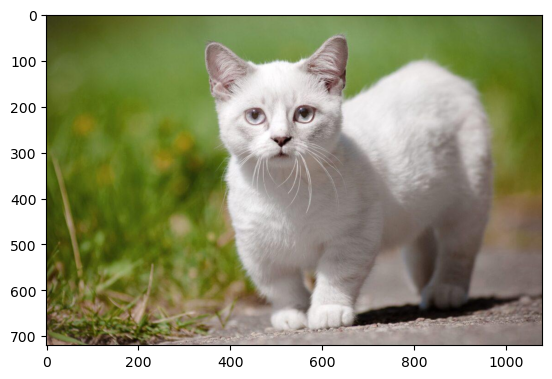

In [3]:
img = cv2.imread('cat_375.jpg')

# BGR to Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('Gray', gray)

# BGR to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2.imshow('HSV', hsv)

# BGR to L*a*b
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
cv2.imshow('LAB', lab)

# BGR to RGB
# cv2 read and show images in BGR format
# matplotlib read and show images in RGB format
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imshow('RGB', rgb)
plt.imshow(rgb)
plt.show()

# HSV to BGR
lab_bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
cv2.imshow('LAB --> BGR', lab_bgr)


cv2.waitKey(0)
cv2.destroyAllWindows()